In [74]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

In [75]:
def seidel(A, b, iter, tol):
  L = np.tril(A, -1)
  U = np.triu(A, 1)
  D = A - L - U

  x = np.linalg.inv(L+D) @ b
  k = 0
  nevyazka = np.array([])
  while np.linalg.norm(A @ x -b) > tol and k < iter:
    z = x
    x = -(np.linalg.inv(L+D) @ U) @ x + np.linalg.inv(L+D) @ b
    k += 1
    nevyazka = np.append(nevyazka, np.linalg.norm(z - x))
  return x, nevyazka, k




In [76]:
import scipy.stats as sts
from scipy.stats import ortho_group
m = ortho_group.rvs(dim=3)

In [77]:
def positive_determined_matrix(d, mu, L):
  diagonal_entries = np.random.uniform(mu, L,d)
  diagonal_entries[0] = mu
  diagonal_entries[1] = L
  D = np.diag(diagonal_entries)
  m = ortho_group.rvs(d)
  A = m.dot(D).dot(np.linalg.inv(m))
  
  return A

In [78]:
A = positive_determined_matrix(100, 0.1, 1)
b = np.array([np.random.rand() for i in range(A.shape[0])])

In [79]:
x = seidel(A, b, 1e5, 1e-6)

In [80]:
x_true = np.linalg.solve(A, b)

In [81]:
print("Приближенное решение: ", x[0])
print("Ошибка: ", np.linalg.norm(x_true - x[0]))
print("Число итераций: ", x[2])


Приближенное решение:  [ 2.41421395  1.45119514  2.63940483  1.28526634 -0.69568415  1.06877061
  0.33357131  1.76995398  0.63905881  2.39775141  0.8868383   1.17384733
  1.31553786  2.5151544   1.30790079  2.89345884  1.28750556  0.1573622
  1.6879902   0.76575242 -0.29657416  0.69585999  0.51661015  0.22581889
  1.95128487 -0.53974322  0.26877423  0.94668707  1.92439557  3.34180761
  2.63896826  0.50577146  0.85494724  0.58156337  0.49876456  2.09480161
  3.052253   -0.77175822  1.47242768  1.63671753  1.38859283  2.0571592
  0.58821868  1.50004763 -0.15609587 -1.09260572  1.01634954  0.51731287
  0.69604759  3.37718866  0.42090107 -0.78413306  1.50461853 -0.4115101
  1.0624488   2.23367092  1.51963851  1.5916348   2.99559951  2.46027944
 -0.88492074  1.49678011 -0.57985629  0.40400611  0.01801762  2.62031864
  1.15614384  0.11274964  0.96520283  0.83117127  0.86708326  1.01296169
  2.19373664  2.21195789  2.73711977  1.74013604  2.83622085  0.21518173
  2.56014014  1.4657272   0.889

In [82]:
np.arange(x[2])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

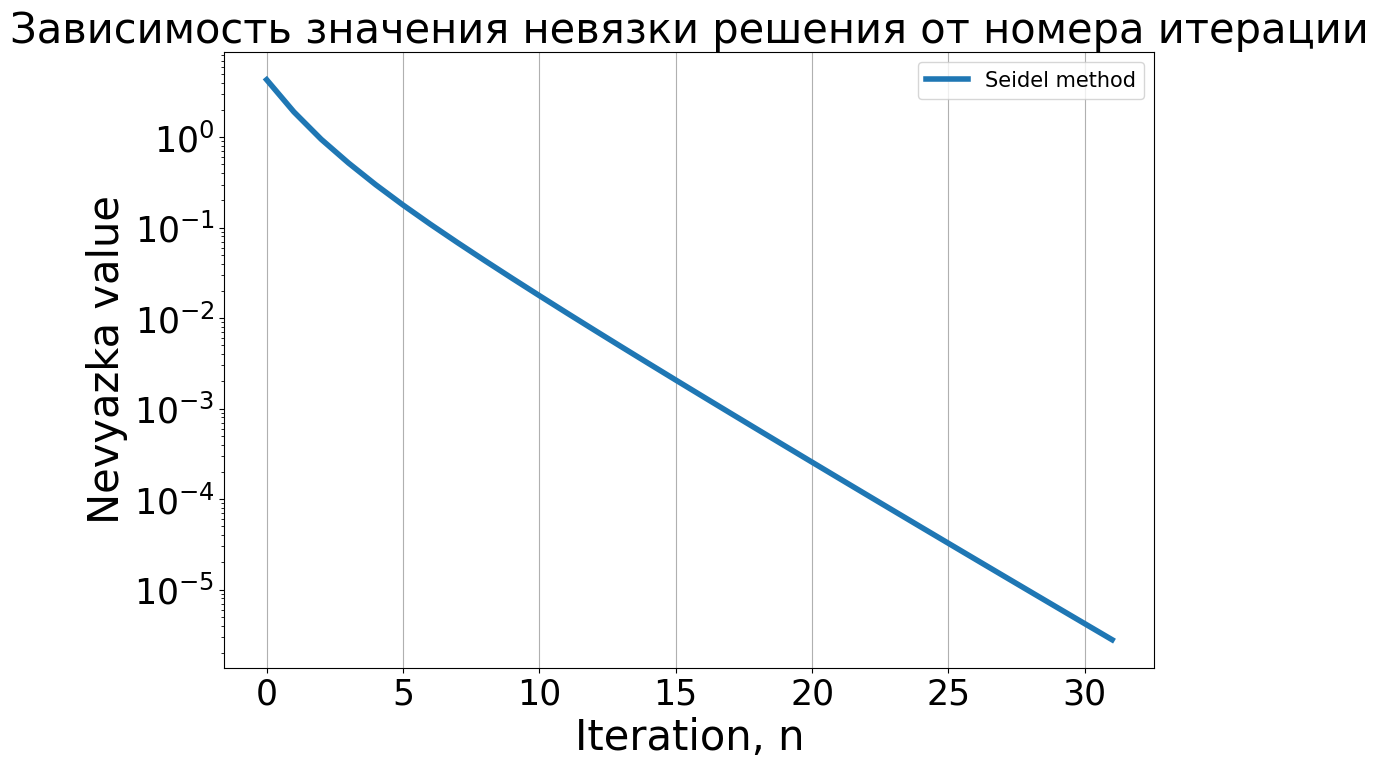

In [83]:
plt.figure(figsize=(12, 8))

plt.semilogy(np.arange(x[2]), x[1], linewidth=4, label = 'Seidel method')

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"Iteration, n", fontsize=30)
plt.ylabel("Nevyazka value", fontsize=30)
plt.title(r"Зависимость значения невязки решения от номера итерации", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)


plt.grid(axis = 'x')